In [ ]:
import pandas as pd

# Given file path
file_path = '/Users/ndubuisiazi/Desktop/House_Model/ATL_RE_Data.csv'

# Read the CSV file into a DataFrame
ATL_RE_Data = pd.read_csv(file_path)


In [46]:
full_features = ATL_RE_Data.columns

In [47]:
full_features

Index(['Unnamed: 0', 'Year Built', 'Square Footage', 'lot sqft', 'Bedrooms',
       'Bathrooms', 'Stories', 'List Price', 'Sold Price', 'List Date',
       'Sold Date', 'Postal Code', 'City', 'State', 'Property Type', 'Tags',
       'County'],
      dtype='object')

In [48]:
# Check for missing values in the dataset
missing_values = ATL_RE_Data.isnull().sum()

# Filter out columns that don't have missing values for clarity
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

missing_values


Tags              777
List Price        750
List Date         750
Square Footage    689
Bedrooms          391
Stories           314
City              293
Year Built        282
lot sqft          254
Bathrooms          84
Sold Price          1
County              1
dtype: int64

In [49]:
# Drop rows where 'Sold Price' is NaN as it's crucial for analysis
ATL_RE_Data = ATL_RE_Data.dropna(subset=['Sold Price'])

In [50]:
ATL_RE_Data = ATL_RE_Data[(ATL_RE_Data['Property Type'] == 'single_family') & (ATL_RE_Data['City'] == 'Atlanta')]

In [51]:
# Calculate statistics
min_price = ATL_RE_Data['Sold Price'].min()
max_price = ATL_RE_Data['Sold Price'].max()
median_price = ATL_RE_Data['Sold Price'].median()

print(f"Minimum Sold Price: ${min_price:,.2f}")
print(f"Maximum Sold Price: ${max_price:,.2f}")
print(f"Median Sold Price: ${median_price:,.2f}")

Minimum Sold Price: $12,750.00
Maximum Sold Price: $8,600,000.00
Median Sold Price: $475,000.00


In [52]:
# Check for missing values in the dataset
missing_values = ATL_RE_Data.isnull().sum()

# Filter out columns that don't have missing values for clarity
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

missing_values

List Price        446
List Date         446
Tags              446
Square Footage    240
Stories            63
Year Built         61
Bedrooms           61
lot sqft           36
Bathrooms           1
dtype: int64

In [53]:
# Convert 'Sold Date' to datetime format
ATL_RE_Data['Sold Date'] = pd.to_datetime(ATL_RE_Data['Sold Date'])

# Extract the year from the 'Sold Date' column
ATL_RE_Data['Sold Year'] = ATL_RE_Data['Sold Date'].dt.year

# Calculate the age of the house
ATL_RE_Data['House Age'] = ATL_RE_Data['Sold Year'] - ATL_RE_Data['Year Built']

# Calculate the SqFt Price
ATL_RE_Data['Sqft Price'] =  ATL_RE_Data['Sold Price']/ATL_RE_Data['Square Footage'] 



In [54]:
import numpy as np

# Step 1: Calculate the correlation matrix
corr_matrix = ATL_RE_Data.corr()

# Step 2: Filter out the upper triangle of the matrix
upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
upper_triangle_corr = corr_matrix.where(upper_triangle)

# Step 3: Find pairs with correlation coefficient above a threshold (e.g., 0.8)
to_drop = [column for column in upper_triangle_corr.columns if any(upper_triangle_corr[column].abs() > 0.8)]

# List of pairs of highly correlated features
highly_correlated_pairs = {}
for column in to_drop:
    # Find the correlated features
    correlated_features = upper_triangle_corr.index[upper_triangle_corr[column].abs() > 0.8].tolist()
    if correlated_features:
        highly_correlated_pairs[column] = correlated_features

highly_correlated_pairs


/var/folders/rt/kgjc4sq946382dtnnq8n_10m0000gn/T/ipykernel_4347/3648543527.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = ATL_RE_Data.corr()


{'Bathrooms': ['Square Footage'],
 'List Price': ['Square Footage'],
 'Sold Price': ['List Price'],
 'House Age': ['Year Built']}

In [55]:
correlation_with_target = ATL_RE_Data.corr()['Sold Price'].sort_values(ascending=False)
print(correlation_with_target)


Sold Price        1.000000
List Price        0.995738
Square Footage    0.798284
Bathrooms         0.723126
Sqft Price        0.587618
Bedrooms          0.533158
Stories           0.446967
Year Built        0.132364
lot sqft         -0.002168
Unnamed: 0       -0.030424
Postal Code      -0.063384
House Age        -0.132364
Sold Year              NaN
Name: Sold Price, dtype: float64


/var/folders/rt/kgjc4sq946382dtnnq8n_10m0000gn/T/ipykernel_4347/3947843769.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = ATL_RE_Data.corr()['Sold Price'].sort_values(ascending=False)


In [56]:

to_remove=['List Price','List Date','Unnamed: 0','List Price','Sold Year','Sold Date', 'Year Built','City','State','Property Type','Tags','County']
ATL_RE_Data.drop(to_remove,axis=1, inplace=True)

In [57]:
ATL_RE_Data

,Square Footage,lot sqft,Bedrooms,Bathrooms,Stories,Sold Price,Postal Code,House Age,Sqft Price
0,1396.0,12807.0,4.0,2.0,1.0,140000.0,30315,61.0,100.286533
1,1000.0,21780.0,3.0,1.0,1.0,195000.0,30331,65.0,195.000000
2,1686.0,21432.0,3.0,2.0,1.0,182900.0,30331,67.0,108.481613
4,1572.0,17424.0,3.0,2.0,1.0,428000.0,30340,62.0,272.264631
5,4200.0,44976.0,4.0,4.0,3.0,1430000.0,30327,57.0,340.476190
...,...,...,...,...,...,...,...,...,...
5713,4769.0,81414.0,5.0,5.0,3.0,2425000.0,30327,4.0,508.492346
5718,954.0,7501.0,3.0,1.0,1.0,235000.0,30318,68.0,246.331237
5721,1809.0,6534.0,3.0,3.0,2.0,440000.0,30318,15.0,243.228303
5724,3439.0,8712.0,5.0,4.0,2.0,700200.0,30345,36.0,203.605699


In [58]:
# Use pandas get_dummies to one-hot encode the 'Postal Code' column again
postal_code_dummies = pd.get_dummies(ATL_RE_Data['Postal Code'], prefix='PostalCode')

# Drop the original 'Postal Code' column and concatenate the one-hot encoded columns
ATL_RE_Data_encoded = pd.concat([ATL_RE_Data.drop('Postal Code', axis=1), postal_code_dummies], axis=1)

# Display the first few rows of the transformed dataframe
#ATL_RE_Data_encoded = ATL_RE_Data
ATL_RE_Data_encoded.head()


,Square Footage,lot sqft,Bedrooms,Bathrooms,Stories,Sold Price,House Age,Sqft Price,PostalCode_30024,PostalCode_30033,...,PostalCode_30339,PostalCode_30340,PostalCode_30341,PostalCode_30342,PostalCode_30344,PostalCode_30345,PostalCode_30349,PostalCode_30350,PostalCode_30354,PostalCode_30360
0,1396.0,12807.0,4.0,2.0,1.0,140000.0,61.0,100.286533,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000.0,21780.0,3.0,1.0,1.0,195000.0,65.0,195.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1686.0,21432.0,3.0,2.0,1.0,182900.0,67.0,108.481613,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1572.0,17424.0,3.0,2.0,1.0,428000.0,62.0,272.264631,0,0,...,0,1,0,0,0,0,0,0,0,0
5,4200.0,44976.0,4.0,4.0,3.0,1430000.0,57.0,340.476190,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
correlation_with_target = ATL_RE_Data_encoded.corr()['Sold Price'].sort_values(ascending=False)
print(correlation_with_target)

Sold Price          1.000000
Square Footage      0.798284
Bathrooms           0.723126
Sqft Price          0.587618
Bedrooms            0.533158
Stories             0.446967
PostalCode_30327    0.346026
PostalCode_30305    0.293066
PostalCode_30342    0.220522
PostalCode_30306    0.180746
PostalCode_30309    0.142778
PostalCode_30319    0.114426
PostalCode_30307    0.092118
PostalCode_30328    0.045696
PostalCode_30339    0.037707
PostalCode_30308    0.035910
PostalCode_30324    0.024721
PostalCode_30350    0.019249
PostalCode_30338    0.004044
PostalCode_30345    0.003965
PostalCode_30312    0.003316
PostalCode_30024   -0.002022
lot sqft           -0.002168
PostalCode_30329   -0.007469
PostalCode_30033   -0.008489
PostalCode_30035   -0.010035
PostalCode_30326   -0.010293
PostalCode_30336   -0.012556
PostalCode_30341   -0.020528
PostalCode_30337   -0.022709
PostalCode_30360   -0.028251
PostalCode_30340   -0.033430
PostalCode_30317   -0.033816
PostalCode_30344   -0.042970
PostalCode_303

In [60]:
ATL_RE_Data_encoded = ATL_RE_Data_encoded.dropna()

In [61]:
ATL_RE_Data_encoded

,Square Footage,lot sqft,Bedrooms,Bathrooms,Stories,Sold Price,House Age,Sqft Price,PostalCode_30024,PostalCode_30033,...,PostalCode_30339,PostalCode_30340,PostalCode_30341,PostalCode_30342,PostalCode_30344,PostalCode_30345,PostalCode_30349,PostalCode_30350,PostalCode_30354,PostalCode_30360
0,1396.0,12807.0,4.0,2.0,1.0,140000.0,61.0,100.286533,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000.0,21780.0,3.0,1.0,1.0,195000.0,65.0,195.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1686.0,21432.0,3.0,2.0,1.0,182900.0,67.0,108.481613,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1572.0,17424.0,3.0,2.0,1.0,428000.0,62.0,272.264631,0,0,...,0,1,0,0,0,0,0,0,0,0
5,4200.0,44976.0,4.0,4.0,3.0,1430000.0,57.0,340.476190,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5713,4769.0,81414.0,5.0,5.0,3.0,2425000.0,4.0,508.492346,0,0,...,0,0,0,0,0,0,0,0,0,0
5718,954.0,7501.0,3.0,1.0,1.0,235000.0,68.0,246.331237,0,0,...,0,0,0,0,0,0,0,0,0,0
5721,1809.0,6534.0,3.0,3.0,2.0,440000.0,15.0,243.228303,0,0,...,0,0,0,0,0,0,0,0,0,0
5724,3439.0,8712.0,5.0,4.0,2.0,700200.0,36.0,203.605699,0,0,...,0,0,0,0,0,1,0,0,0,0


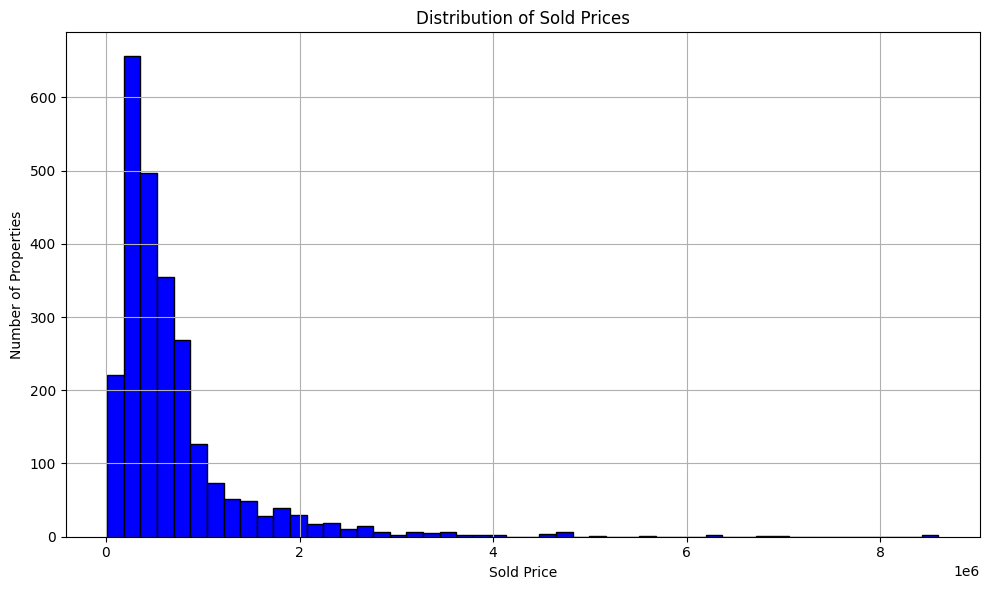

In [62]:

import matplotlib.pyplot as plt

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(ATL_RE_Data_encoded['Sold Price'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Sold Prices')
plt.xlabel('Sold Price')
plt.ylabel('Number of Properties')
plt.grid(True)
plt.tight_layout()
plt.show()



## Data Visualization

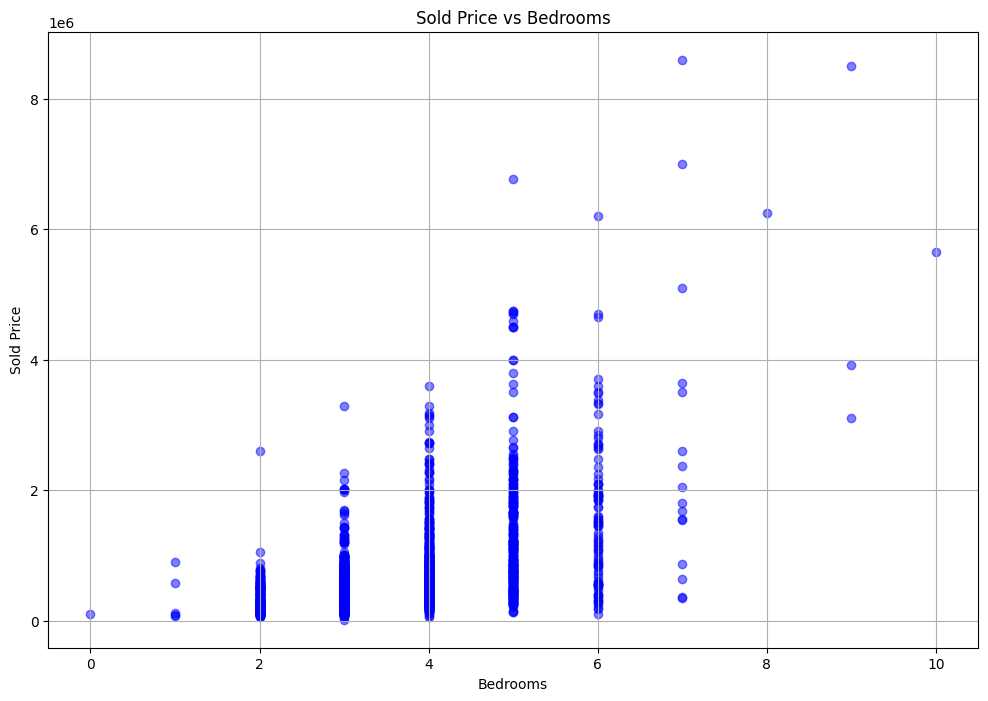

In [63]:
plt.figure(figsize=(12, 8))
plt.scatter(ATL_RE_Data_encoded['Bedrooms'], ATL_RE_Data_encoded['Sold Price'], alpha=0.5, color='blue')
plt.title('Sold Price vs Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Sold Price')
plt.grid(True)
plt.show()

In [64]:
# Calculate statistics
min_price = ATL_RE_Data_encoded['Sold Price'].min()
max_price = ATL_RE_Data_encoded['Sold Price'].max()
median_price = ATL_RE_Data_encoded['Sold Price'].median()

median_age = ATL_RE_Data_encoded['House Age'].median()
median_SqFt = ATL_RE_Data_encoded['Square Footage'].median()
median_bedrooms = ATL_RE_Data_encoded['Bedrooms'].median()
mode_bedrooms = ATL_RE_Data_encoded['Bedrooms'].mode()[0]

print("Median number of bedrooms:", median_bedrooms)
print("Most common number of bedrooms (mode):", mode_bedrooms)
print(f"median_age: {median_age:,.2f}")
print(f"median_SqFt: {median_SqFt:,.2f}")
print(f"Minimum Sold Price: ${min_price:,.2f}")
print(f"Maximum Sold Price: ${max_price:,.2f}")
print(f"Median Sold Price: ${median_price:,.2f}")


Median number of bedrooms: 3.0
Most common number of bedrooms (mode): 3.0
median_age: 64.00
median_SqFt: 1,944.00
Minimum Sold Price: $12,750.00
Maximum Sold Price: $8,600,000.00
Median Sold Price: $476,000.00


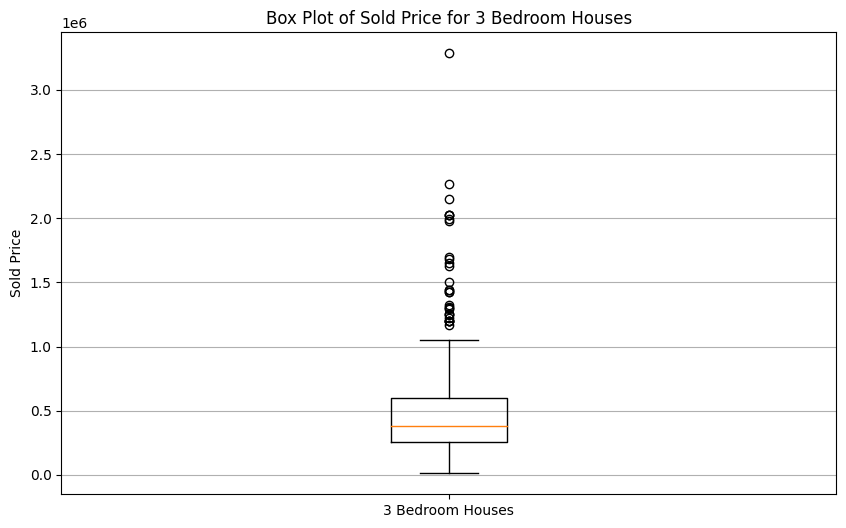

In [65]:
# Assuming you want to plot the 'Sold Price' for houses with 3 bedrooms
Bedrooms_3 = ATL_RE_Data_encoded[ATL_RE_Data_encoded['Bedrooms'] == 3]

# Creating a box plot for the 'Sold Price' column
plt.figure(figsize=(10, 6))
plt.boxplot(Bedrooms_3['Sold Price'].dropna())  # Dropping NaN values if any
plt.title('Box Plot of Sold Price for 3 Bedroom Houses')
plt.ylabel('Sold Price')
plt.xticks([1], ['3 Bedroom Houses'])
plt.grid(axis='y')
plt.show()



In [66]:
# Filter the dataset to exclude outliers
three_bedroom_no_outliers = three_bedroom_data[(three_bedroom_data['Sold Price'] >= lower_boundary) & 
                                               (three_bedroom_data['Sold Price'] <= upper_boundary)]

# Compute Q1, Q3, and IQR for 'Sold Price'
Q1 = three_bedroom_data['Sold Price'].quantile(0.25)
Q3 = three_bedroom_data['Sold Price'].quantile(0.75)
IQR = Q3 - Q1

# Define boundaries
lower_boundary = Q1 - 1.5 * IQR
upper_boundary = Q3 + 1.5 * IQR

# Filter the dataset for outliers
outliers = three_bedroom_data[(three_bedroom_data['Sold Price'] < lower_boundary) | 
                              (three_bedroom_data['Sold Price'] > upper_boundary)]

print(outliers[['Sold Price']])


NameError: name 'three_bedroom_data' is not defined

In [ ]:
# Using the boundaries defined above, filter the dataset to exclude outliers
three_bedroom_no_outliers = three_bedroom_data[(three_bedroom_data['Sold Price'] >= lower_boundary) & 
                                               (three_bedroom_data['Sold Price'] <= upper_boundary)]

# Display the shape of the original and cleaned datasets to see how many rows were removed
original_shape = three_bedroom_data.shape[0]
cleaned_shape = three_bedroom_no_outliers.shape[0]
rows_removed = original_shape - cleaned_shape

original_shape, cleaned_shape, rows_removed


In [ ]:
# Calculate the correlation matrix for the latest dataset
corr_matrix = ATL_RE_Data_encoded.corr()

# Visualizing the correlation matrix using a heatmap
# Increase the figure size
plt.figure(figsize=(20, 15))

# Plot the heatmap using matplotlib
plt.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar()
plt.title('Correlation Heatmap', fontsize=16)

# Modify axes
ticks = np.arange(0, len(corr_matrix.columns), 1)
plt.xticks(ticks, corr_matrix.columns, rotation=90, fontsize=8)
plt.yticks(ticks, corr_matrix.columns, fontsize=8)

plt.tight_layout()
plt.show()



In [68]:
import xgboost as xgb
# Initialize the model
model_xgb = xgb.XGBRegressor(objective ='reg:squarederror')

# Train the model
model_xgb.fit(X_train, y_train)


ModuleNotFoundError: No module named 'xgboost'

In [67]:
# Predict on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Calculate and print metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"R-squared (R2): {r2_xgb}")


NameError: name 'model_xgb' is not defined